In [0]:
cd /content/

/content


In [0]:
! git clone https://github.com/k223kim/animal_data.git

Cloning into 'animal_data'...
remote: Enumerating objects: 13717, done.
remote: Total 13717 (delta 0), reused 0 (delta 0), pack-reused 13717
Receiving objects: 100% (13717/13717), 311.01 MiB | 11.13 MiB/s, done.
Checking out files: 100% (13996/13996), done.


In [0]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

In [0]:
file_list = []
class_list = []

In [0]:
DATADIR = "animal_data/animals10/"

In [0]:
CATEGORIES = ["cat", "dog", "spider", "squirrel"]
IMG_SIZE = 100
training_data = []

In [0]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  class_num = CATEGORIES.index(category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    training_data.append([new_array, class_num])

In [0]:
random.shuffle(training_data)

In [0]:
def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    #class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
     # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      #training_data.append([new_array, class_num])
     # except Exception as e:
     #   pass

In [0]:
create_training_data()
random.shuffle(training_data)

In [0]:
print(img_array)

[[ 42  42  43 ...  46  47  49]
 [ 40  40  41 ...  51  51  53]
 [ 37  37  38 ...  69  68  69]
 ...
 [129 117 122 ...  48  15  16]
 [127 115 120 ...  22   7  22]
 [126 114 118 ...   7  12  40]]


In [0]:
X = [] #features
y = [] #labels

In [0]:
for features, label in training_data:
  X.append(features)
  y.append(label)

In [0]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
print(X)

[[[[ 64]
   [ 63]
   [ 62]
   ...
   [ 64]
   [ 64]
   [ 64]]

  [[ 62]
   [ 61]
   [ 60]
   ...
   [ 64]
   [ 64]
   [ 62]]

  [[ 61]
   [ 60]
   [ 59]
   ...
   [ 64]
   [ 64]
   [ 62]]

  ...

  [[ 77]
   [130]
   [ 68]
   ...
   [127]
   [165]
   [133]]

  [[ 98]
   [ 60]
   [ 67]
   ...
   [121]
   [135]
   [106]]

  [[ 89]
   [ 84]
   [ 94]
   ...
   [122]
   [113]
   [ 90]]]


 [[[224]
   [244]
   [234]
   ...
   [238]
   [233]
   [249]]

  [[208]
   [224]
   [236]
   ...
   [227]
   [240]
   [227]]

  [[222]
   [216]
   [242]
   ...
   [203]
   [196]
   [223]]

  ...

  [[113]
   [111]
   [128]
   ...
   [170]
   [153]
   [135]]

  [[147]
   [139]
   [174]
   ...
   [206]
   [188]
   [172]]

  [[137]
   [148]
   [190]
   ...
   [179]
   [180]
   [185]]]


 [[[ 55]
   [ 53]
   [ 53]
   ...
   [246]
   [244]
   [243]]

  [[ 55]
   [ 55]
   [ 52]
   ...
   [243]
   [243]
   [242]]

  [[ 56]
   [ 56]
   [ 54]
   ...
   [243]
   [243]
   [242]]

  ...

  [[ 53]
   [ 52]
   [ 65]
   

In [0]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close() 

In [0]:
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [0]:
#Building the convolutional neural network

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pickle
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
import time

Using TensorFlow backend.


In [0]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

In [0]:
#normalizing data (a pixel goes from 0 to 255)
X = X/255.0

In [0]:
val_perc = 0.10
val_count = int(val_perc * len(X))
print(val_count)
val_data = X[:val_count][:]
val_labels = y[:val_count][:]
print(val_data)

1399
[[[[0.25098039]
   [0.24705882]
   [0.24313725]
   ...
   [0.25098039]
   [0.25098039]
   [0.25098039]]

  [[0.24313725]
   [0.23921569]
   [0.23529412]
   ...
   [0.25098039]
   [0.25098039]
   [0.24313725]]

  [[0.23921569]
   [0.23529412]
   [0.23137255]
   ...
   [0.25098039]
   [0.25098039]
   [0.24313725]]

  ...

  [[0.30196078]
   [0.50980392]
   [0.26666667]
   ...
   [0.49803922]
   [0.64705882]
   [0.52156863]]

  [[0.38431373]
   [0.23529412]
   [0.2627451 ]
   ...
   [0.4745098 ]
   [0.52941176]
   [0.41568627]]

  [[0.34901961]
   [0.32941176]
   [0.36862745]
   ...
   [0.47843137]
   [0.44313725]
   [0.35294118]]]


 [[[0.87843137]
   [0.95686275]
   [0.91764706]
   ...
   [0.93333333]
   [0.91372549]
   [0.97647059]]

  [[0.81568627]
   [0.87843137]
   [0.9254902 ]
   ...
   [0.89019608]
   [0.94117647]
   [0.89019608]]

  [[0.87058824]
   [0.84705882]
   [0.94901961]
   ...
   [0.79607843]
   [0.76862745]
   [0.8745098 ]]

  ...

  [[0.44313725]
   [0.43529412]
  

In [0]:
train_data = X[val_count:][:]
train_labels = y[val_count:][:]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
[[[[0.25098039]
   [0.24705882]
   [0.24313725]
   ...
   [0.25098039]
   [0.25098039]
   [0.25098039]]

  [[0.24313725]
   [0.23921569]
   [0.23529412]
   ...
   [0.25098039]
   [0.25098039]
   [0.24313725]]

  [[0.23921569]
   [0.23529412]
   [0.23137255]
   ...
   [0.25098039]
   [0.25098039]
   [0.24313725]]

  ...

  [[0.30196078]
   [0.50980392]
   [0.26666667]
   ...
   [0.49803922]
   [0.64705882]
   [0.52156863]]

  [[0.38431373]
   [0.23529412]
   [0.2627451 ]
   ...
   [0.4745098 ]
   [0.52941176]
   [0.41568627]]

  [[0.34901961]
   [0.32941176]
   [0.36862745]
   ...
   [0.47843137]
   [0.44313725]
   [0.35294118]]]


 [[[0.87843137]
   [0.95686275]
   [0.91764706]
   ...
   [0.93333333]
   [0.91372549]
   [0.97647059]]

  [[0.81568627]
   [0.87843137]
   [0.9254902 ]
   ...
   [0.89019608]
   [0.94117647]
   [0.89019608]]

  [[0.87058824]
   [0.84705882]
   [0.94901961]
   ...
   [0.79607843]

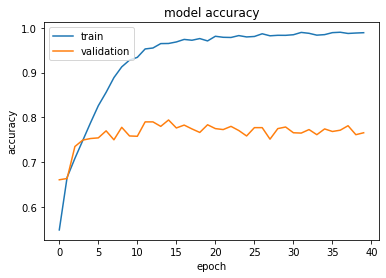

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

#2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

#The output layer with 4 neurons, for 4 classes
model.add(Dense(4))
model.add(Activation("softmax"))

#Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(X)
print(y)
#Training the model, with 40 iterations
#validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.1)

#Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save("CNN.model")

#Printing a graph showing the accuracy changes during the training phse
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [0]:
datagen = ImageDataGenerator(rotation_range = 30, zoom_range = 0.25, width_shift_range=0.1, height_shift_range=0.1)

In [0]:


#create multiple cnn model for ensembling
#model 1
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (100, 100, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

# use adam optimizer and categorical cross entropy cost
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])



In [0]:
# after each epoch decrease learning rate by 0.95
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# train
epochs = 50
j=0
start_time = time.time()
history = model.fit_generator(datagen.flow(train_data, train_labels, batch_size=64),epochs = epochs, steps_per_epoch = X.shape[0]/64, validation_data = (val_data, val_labels), callbacks=[annealer], verbose=1)
end_time = time.time()
print_time_taken(start_time, end_time)


print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(j+1,epochs,history.history['acc'][epochs-1],history.history['val_acc'][epochs-1]))








Epoch 1/50


FailedPreconditionError: ignored

In [0]:
import cv2
import tensorflow as tf

In [0]:
CATEGORIES = ["cat", "dog", "spider", "squirrel"]

In [0]:
def prepare(file):
  IMG_SIZE = 50
  img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
model = tf.keras.models.load_model("CNN.model")

In [0]:
cd /content/animal_data/animals10/cat/

In [0]:
image = 1.jpeg
prediction = model.predict([image])
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])